**Defining the question**

**Descrie the Data Analysis Question**

Analysis to infer on electric car usage in a car-sharing service company

**Define Metric for Success**

The main objective of this analysis is to be conscious of the rate at which electric car is used.
In order to meet this objective the analysis will be able to give a solution to the following research questions:

Which time in paris do a company receives more incoming request for a shared electric car (Bluecar)?

What is the most popular hour for returning cars?

What station is the most popular?
Overall?
At the most popular picking hour?

What postal code is the most popular for picking up Blue cars?
Does the most popular station belong to that postal code?
Overall?
At the most popular picking hour?

Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

**Recording Experimental Design**

Import libraries.

Load Datasets.

Explore

Clean Datasets

Data Analysis

Recommendation






**Import Python Libraries**

In [426]:
# Import Python Libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

**Load the Datasets**

In [427]:
#upload the file
#Load the datasets
url= '/content/Autolib_dataset (2).csv'
df=pd.read_csv(url)

In [428]:
#preview the dataset
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


**Explore the Dataset**

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

Select a sample

In [430]:
# preview the first five records
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [431]:
# view the last 5 records
df.tail()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


In [432]:
sample=df.sample(10)
sample

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4686,123 Grande Rue,3,3,1,2,0,nonexistent,SÃ¨vres,NaN,sevres-granderue-123,STATION,"48.821593, 2.2050638",92310,SÃ¨vres/Grande Rue/123,operational,NaN,0,station,ok,nonexistent,2018,4,2,5,30
339,12 rue Armengaud,4,4,0,0,0,operational,Saint-Cloud,NaN,saintcloud-armengaud-12,STATION,"48.84652, 2.216632",92220,Saint-Cloud/Armengaud/12,operational,NaN,3,station,ok,nonexistent,2018,4,2,15,43
841,108 Rue Jouffroy d'Abbans,4,4,0,0,0,operational,Paris,NaN,paris-jouffroydabbans-108,STATION,"48.8823377, 2.3018911",75017,Paris/Jouffroy d'Abbans/108,operational,NaN,0,station,ok,nonexistent,2018,4,4,3,15
4470,91 Rue du Faubourg Saint-HonorÃ©,0,0,0,0,0,broken,Paris,NaN,paris-sainthonore-91,STATION,"48.872047, 2.3131252",75008,Paris/Saint-HonorÃ©/91,broken,NaN,0,station,closed,nonexistent,2018,4,1,20,17
2210,2 avenue de la Porte Saint-Cloud,6,6,0,0,0,nonexistent,Paris,NaN,paris-portesaintcloud-parking,PARKING,"48.83882, 2.2537",75016,Paris/Porte Saint-Cloud/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,5,11,56
248,79 rue AndrÃ© Joineau,6,6,0,0,0,nonexistent,Le PrÃ©-Saint-Gervais,NaN,lepresaintgervais-andrejoineau-79,STATION,"48.8832598, 2.4037001",93310,Le PrÃ©-Saint-Gervais/AndrÃ© Joineau/79,operational,NaN,1,station,ok,nonexistent,2018,4,4,9,3
4978,42 Rue Victor Hugo,6,6,0,0,0,nonexistent,Colombes,NaN,colombes-victorhugo-42,STATION,"48.92087, 2.264111",92700,Colombes/Victor Hugo/42,operational,NaN,0,station,ok,nonexistent,2018,4,2,8,30
1776,55 rue d'Auteuil,1,1,0,0,0,nonexistent,Paris,NaN,paris-auteuil-55,STATION,"48.8478106, 2.2636439",75016,Paris/Auteuil/55,operational,NaN,0,station,ok,nonexistent,2018,4,5,9,14
3078,215 rue Henri Barbusse,4,4,0,0,0,nonexistent,Argenteuil,NaN,argenteuil-henribarbusse-215,STATION,"48.93154, 2.229872",95100,Argenteuil/Henri Barbusse/215,operational,NaN,2,station,ok,nonexistent,2018,4,6,5,20
2296,1 rue Claude Terrasse,1,1,0,0,0,operational,Le Blanc-Mesnil,NaN,leblancmesnil-claudeterrasse-1,STATION,"48.9376981, 2.462453",93150,Le Blanc-Mesnil/Claude Terrasse/1,operational,NaN,5,station,ok,nonexistent,2018,4,3,0,49


Select training and Test samples

In [433]:
#separate numeric data from attribute labels
NumericArray=sample.values
print(NumericArray)



[['123 Grande Rue' 3 3 1 2 0 'nonexistent' 'SÃ¨vres' nan
  'sevres-granderue-123' 'STATION' '48.821593, 2.2050638' 92310
  'SÃ¨vres/Grande Rue/123' 'operational' nan 0 'station' 'ok'
  'nonexistent' 2018 4 2 5 30]
 ['12 rue Armengaud' 4 4 0 0 0 'operational' 'Saint-Cloud' nan
  'saintcloud-armengaud-12' 'STATION' '48.84652, 2.216632' 92220
  'Saint-Cloud/Armengaud/12' 'operational' nan 3 'station' 'ok'
  'nonexistent' 2018 4 2 15 43]
 ["108 Rue Jouffroy d'Abbans" 4 4 0 0 0 'operational' 'Paris' nan
  'paris-jouffroydabbans-108' 'STATION' '48.8823377, 2.3018911' 75017
  "Paris/Jouffroy d'Abbans/108" 'operational' nan 0 'station' 'ok'
  'nonexistent' 2018 4 4 3 15]
 ['91 Rue du Faubourg Saint-HonorÃ©' 0 0 0 0 0 'broken' 'Paris' nan
  'paris-sainthonore-91' 'STATION' '48.872047, 2.3131252' 75008
  'Paris/Saint-HonorÃ©/91' 'broken' nan 0 'station' 'closed'
  'nonexistent' 2018 4 1 20 17]
 ['2 avenue de la Porte Saint-Cloud' 6 6 0 0 0 'nonexistent' 'Paris' nan
  'paris-portesaintcloud-parki

In [434]:
# slice the numeric data into Training and Test samples
split=10
TrainingSample,TestSample=NumericArray[:split,:] , NumericArray[split:,:]
print("Training Sample\n" , TrainingSample)
print("\nTest Sample\n" , TestSample)


Training Sample
 [['123 Grande Rue' 3 3 1 2 0 'nonexistent' 'SÃ¨vres' nan
  'sevres-granderue-123' 'STATION' '48.821593, 2.2050638' 92310
  'SÃ¨vres/Grande Rue/123' 'operational' nan 0 'station' 'ok'
  'nonexistent' 2018 4 2 5 30]
 ['12 rue Armengaud' 4 4 0 0 0 'operational' 'Saint-Cloud' nan
  'saintcloud-armengaud-12' 'STATION' '48.84652, 2.216632' 92220
  'Saint-Cloud/Armengaud/12' 'operational' nan 3 'station' 'ok'
  'nonexistent' 2018 4 2 15 43]
 ["108 Rue Jouffroy d'Abbans" 4 4 0 0 0 'operational' 'Paris' nan
  'paris-jouffroydabbans-108' 'STATION' '48.8823377, 2.3018911' 75017
  "Paris/Jouffroy d'Abbans/108" 'operational' nan 0 'station' 'ok'
  'nonexistent' 2018 4 4 3 15]
 ['91 Rue du Faubourg Saint-HonorÃ©' 0 0 0 0 0 'broken' 'Paris' nan
  'paris-sainthonore-91' 'STATION' '48.872047, 2.3131252' 75008
  'Paris/Saint-HonorÃ©/91' 'broken' nan 0 'station' 'closed'
  'nonexistent' 2018 4 1 20 17]
 ['2 avenue de la Porte Saint-Cloud' 6 6 0 0 0 'nonexistent' 'Paris' nan
  'paris-port

In [435]:
#split Training Sample into input and output  attribute
X_Attributes_TrainingSample=TrainingSample[: , 0: -1]
Y_Attributes_TrainingSample=TrainingSample[:, -1]
print("input attributes Sample\n" , X_Attributes_TrainingSample)
print("\n Output attributes Sample\n" , Y_Attributes_TrainingSample)



input attributes Sample
 [['123 Grande Rue' 3 3 1 2 0 'nonexistent' 'SÃ¨vres' nan
  'sevres-granderue-123' 'STATION' '48.821593, 2.2050638' 92310
  'SÃ¨vres/Grande Rue/123' 'operational' nan 0 'station' 'ok'
  'nonexistent' 2018 4 2 5]
 ['12 rue Armengaud' 4 4 0 0 0 'operational' 'Saint-Cloud' nan
  'saintcloud-armengaud-12' 'STATION' '48.84652, 2.216632' 92220
  'Saint-Cloud/Armengaud/12' 'operational' nan 3 'station' 'ok'
  'nonexistent' 2018 4 2 15]
 ["108 Rue Jouffroy d'Abbans" 4 4 0 0 0 'operational' 'Paris' nan
  'paris-jouffroydabbans-108' 'STATION' '48.8823377, 2.3018911' 75017
  "Paris/Jouffroy d'Abbans/108" 'operational' nan 0 'station' 'ok'
  'nonexistent' 2018 4 4 3]
 ['91 Rue du Faubourg Saint-HonorÃ©' 0 0 0 0 0 'broken' 'Paris' nan
  'paris-sainthonore-91' 'STATION' '48.872047, 2.3131252' 75008
  'Paris/Saint-HonorÃ©/91' 'broken' nan 0 'station' 'closed'
  'nonexistent' 2018 4 1 20]
 ['2 avenue de la Porte Saint-Cloud' 6 6 0 0 0 'nonexistent' 'Paris' nan
  'paris-portesai

**Data Cleaning**

In [436]:
# preview the dataset column names
df.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

*Perform a validation check*

Drop column cars since it has same values with the column for Blue cars.

Drop column Address since we can get it through postal code.

Drop column for Displayed comment since it has got alot of missing value

In [437]:
# Drop unnecesary column
df.drop(['Displayed comment', 'Address', 'Cars'], axis = 1, inplace = True)

In [438]:
#create a list of column names
columnns=['Blue_CarCounter' , 'Utilib_Counter' , 'Utilib1.4_Counter', 'Charge_Slots', 'Charge_Status', 'City', 'ID', 'Kind', 'Geo_Point',
       'Postal_Code', 'Public_Name', 'Rental_Status', 'Scheduled_At','Slots',
       'Station_Type', 'Status', 'Subscription_Status', 'Year', 'Month', 'Day',
       'Hour', 'Minute']


In [439]:
#preview column names 
#use strip() to get lead of leading and trailing characters
df.columns.str.strip()

Index(['Bluecar counter', 'Utilib counter', 'Utilib 1.4 counter',
       'Charge Slots', 'Charging Status', 'City', 'ID', 'Kind', 'Geo point',
       'Postal code', 'Public name', 'Rental status', 'Scheduled at', 'Slots',
       'Station type', 'Status', 'Subscription status', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

In [440]:
#Change to lower case
df.columns = map(str.lower, df.columns)

In [441]:
# preview the columns
df.columns

Index(['bluecar counter', 'utilib counter', 'utilib 1.4 counter',
       'charge slots', 'charging status', 'city', 'id', 'kind', 'geo point',
       'postal code', 'public name', 'rental status', 'scheduled at', 'slots',
       'station type', 'status', 'subscription status', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

Check for missing values

In [442]:
# we count the number of non - missing values in the df dataframe 
df.count()

bluecar counter        5000
utilib counter         5000
utilib 1.4 counter     5000
charge slots           5000
charging status        5000
city                   5000
id                     5000
kind                   5000
geo point              5000
postal code            5000
public name            5000
rental status          5000
scheduled at             47
slots                  5000
station type           5000
status                 5000
subscription status    5000
year                   5000
month                  5000
day                    5000
hour                   5000
minute                 5000
dtype: int64

In [443]:
#subtract the no. of non-missing rows from the total number
num_rows= df.shape[0] 
num_rows - df.count() 


bluecar counter           0
utilib counter            0
utilib 1.4 counter        0
charge slots              0
charging status           0
city                      0
id                        0
kind                      0
geo point                 0
postal code               0
public name               0
rental status             0
scheduled at           4953
slots                     0
station type              0
status                    0
subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [444]:
#check for null values
df.isnull()

,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,charging status,city,id,kind,geo point,postal code,public name,rental status,scheduled at,slots,station type,status,subscription status,year,month,day,hour,minute
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Filling Missing Values

In [445]:
# use forward fill to fill in missing values
df_fill_forward=df.fillna(method='ffill')
# preview  the dataset
df_fill_forward

,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,charging status,city,id,kind,geo point,postal code,public name,rental status,scheduled at,slots,station type,status,subscription status,year,month,day,hour,minute
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,2012-09-17T08:57:28,3,station,ok,nonexistent,2018,4,6,11,26
4996,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2012-09-17T08:57:28,2,station,ok,nonexistent,2018,4,4,16,56
4997,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,2012-09-17T08:57:28,4,station,ok,nonexistent,2018,4,1,7,1
4998,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,2012-09-17T08:57:28,3,station,ok,nonexistent,2018,4,4,17,27


In [446]:
#use backward fill to replace missing values
df_fill_backward=df_fill_forward.fillna(method='bfill')
#use backward fill method to replace null values
df_fill_backward

,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,charging status,city,id,kind,geo point,postal code,public name,rental status,scheduled at,slots,station type,status,subscription status,year,month,day,hour,minute
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2016-07-27T15:32:21,2,station,ok,nonexistent,2018,4,8,11,43
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,2016-07-27T15:32:21,0,station,ok,nonexistent,2018,4,6,7,24
2,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2016-07-27T15:32:21,1,station,ok,nonexistent,2018,4,3,20,14
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2016-07-27T15:32:21,2,station,ok,nonexistent,2018,4,4,4,37
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,2016-07-27T15:32:21,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,2012-09-17T08:57:28,3,station,ok,nonexistent,2018,4,6,11,26
4996,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2012-09-17T08:57:28,2,station,ok,nonexistent,2018,4,4,16,56
4997,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,2012-09-17T08:57:28,4,station,ok,nonexistent,2018,4,1,7,1
4998,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,2012-09-17T08:57:28,3,station,ok,nonexistent,2018,4,4,17,27


In [447]:
# Define a new variable and assign it data with non missing values
df2=df_fill_backward
df2

,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,charging status,city,id,kind,geo point,postal code,public name,rental status,scheduled at,slots,station type,status,subscription status,year,month,day,hour,minute
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2016-07-27T15:32:21,2,station,ok,nonexistent,2018,4,8,11,43
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,2016-07-27T15:32:21,0,station,ok,nonexistent,2018,4,6,7,24
2,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2016-07-27T15:32:21,1,station,ok,nonexistent,2018,4,3,20,14
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2016-07-27T15:32:21,2,station,ok,nonexistent,2018,4,4,4,37
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,2016-07-27T15:32:21,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,2012-09-17T08:57:28,3,station,ok,nonexistent,2018,4,6,11,26
4996,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2012-09-17T08:57:28,2,station,ok,nonexistent,2018,4,4,16,56
4997,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,2012-09-17T08:57:28,4,station,ok,nonexistent,2018,4,1,7,1
4998,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,2012-09-17T08:57:28,3,station,ok,nonexistent,2018,4,4,17,27


Smoothening noisy data



In [448]:
#Calculating our first, third quantiles and then later our IQR
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
IQR

bluecar counter           4.0
utilib counter            0.0
utilib 1.4 counter        0.0
charge slots              0.0
postal code           17308.0
slots                     3.0
year                      0.0
month                     0.0
day                       4.0
hour                     12.0
minute                   30.0
dtype: float64

In [449]:
#Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
df_out = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [450]:
# Printing the shape of our new dataset
df_out.shape

(3317, 22)

Resolving Incosistencies

We use Data transformation techniques

In [451]:
#labelling the data
#import the necessary libraries
from sklearn import preprocessing

# perform data Labelling
Encoder=preprocessing.LabelEncoder()
Encoded_df=df2.apply(preprocessing.LabelEncoder().fit_transform)
print("Encoded_df:\n", Encoded_df)

Encoded_df:
       bluecar counter  utilib counter  utilib 1.4 counter  ...  day  hour  minute
0                   0               0                   0  ...    7    11      43
1                   6               0                   0  ...    5     7      24
2                   3               0                   2  ...    2    20      14
3                   3               1                   0  ...    3     4      37
4                   3               0                   0  ...    7    17      23
...               ...             ...                 ...  ...  ...   ...     ...
4995                2               0                   0  ...    5    11      26
4996                4               0                   0  ...    3    16      56
4997                1               0                   0  ...    0     7       1
4998                2               0                   0  ...    3    17      27
4999                4               0                   0  ...    7    10       2

[5

Normalizing the Data

In [452]:
# import the necessary package
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
#perform data labelling
Encoder=preprocessing.LabelEncoder()
Encoded_df=df2.apply(preprocessing.LabelEncoder().fit_transform)
#separate numeric data from attribute labels
Numeric_Data= Encoded_df.values
print("\n Un Normalized Data:\n" , Y_Attributes_TrainingSample)


 Un Normalized Data:
 [30 43 15 17 56 3 30 14 20 49]


In [453]:
#split Training samples into input  and output attributes
x_Attributes_TrainingSample=TrainingSample[:, 0: -1]
Y_Attributes_TrainingSample=TrainingSample[:, -1]
print("\n Un Normalized Data:\n" , X_Attributes_TrainingSample)
print("\n Output attribute Sample:\n" , Y_Attributes_TrainingSample)


 Un Normalized Data:
 [['123 Grande Rue' 3 3 1 2 0 'nonexistent' 'SÃ¨vres' nan
  'sevres-granderue-123' 'STATION' '48.821593, 2.2050638' 92310
  'SÃ¨vres/Grande Rue/123' 'operational' nan 0 'station' 'ok'
  'nonexistent' 2018 4 2 5]
 ['12 rue Armengaud' 4 4 0 0 0 'operational' 'Saint-Cloud' nan
  'saintcloud-armengaud-12' 'STATION' '48.84652, 2.216632' 92220
  'Saint-Cloud/Armengaud/12' 'operational' nan 3 'station' 'ok'
  'nonexistent' 2018 4 2 15]
 ["108 Rue Jouffroy d'Abbans" 4 4 0 0 0 'operational' 'Paris' nan
  'paris-jouffroydabbans-108' 'STATION' '48.8823377, 2.3018911' 75017
  "Paris/Jouffroy d'Abbans/108" 'operational' nan 0 'station' 'ok'
  'nonexistent' 2018 4 4 3]
 ['91 Rue du Faubourg Saint-HonorÃ©' 0 0 0 0 0 'broken' 'Paris' nan
  'paris-sainthonore-91' 'STATION' '48.872047, 2.3131252' 75008
  'Paris/Saint-HonorÃ©/91' 'broken' nan 0 'station' 'closed'
  'nonexistent' 2018 4 1 20]
 ['2 avenue de la Porte Saint-Cloud' 6 6 0 0 0 'nonexistent' 'Paris' nan
  'paris-portesaint

In [454]:
# Normalize input training sample
#normalized_X_Attributes= preprocessing.normalize(X_Attributes_TrainingSample.astype(float))
#print("\nNormalized Input Attributes:\n" , normalized_X_Attributes)


**Analysis**

Research Questions

In [459]:
# Question One

#identify all Electric Cars in Paris
BlueCarCounter=df[df['city'] =='Paris']

#prevuew all Electric Cars in Paris
BlueCarCounter.head()


,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,charging status,city,id,kind,geo point,postal code,public name,rental status,scheduled at,slots,station type,status,subscription status,year,month,day,hour,minute,blue_car_difference
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,NaN
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,6.0
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37,0.0
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23,0.0
5,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2,-3.0


In [456]:
#split by city
city=df.groupby('city')

In [457]:
# create a new column to store the difference
df['blue_car_difference']=df['bluecar counter'].diff()
#preview the dataset
df

,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,charging status,city,id,kind,geo point,postal code,public name,rental status,scheduled at,slots,station type,status,subscription status,year,month,day,hour,minute,blue_car_difference
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,NaN
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,6.0
2,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14,-3.0
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37,0.0
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26,2.0
4996,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56,2.0
4997,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1,-3.0
4998,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27,1.0


In [462]:
# # positive value means a car was returned
# Negative value means a car was taken
# Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018
df4_blue=BlueCarCounter[BlueCarCounter['blue_car_difference'] < 0].groupby('hour')['hour'].count().sort_values(ascending= False)
df4_blue

hour
21    80
16    68
7     64
13    62
5     62
23    61
20    61
3     60
8     59
4     58
18    57
9     57
17    55
19    55
22    55
14    54
12    54
0     52
10    52
2     51
6     50
15    49
11    47
1     43
Name: hour, dtype: int64

In [ ]:
# Question Two

#What is the most popular hour for returning cars?

BlueCarCounter[BlueCarCounter['blue_car_difference'] > 0].groupby('hour')['hour'].count().sort_values(ascending= False)


**Visualization**

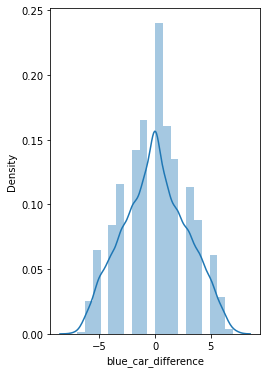

In [467]:
#Density estimation of values using distplot
plt.figure(1 , figsize = (15 , 6))
feature_list = ['blue_car_difference']
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5 )
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5 )
    sns.distplot(df[i], bins=20,  kde = True)
    pos = pos + 1
plt.show()

Text(0.5, 0, 'blue_car_difference')

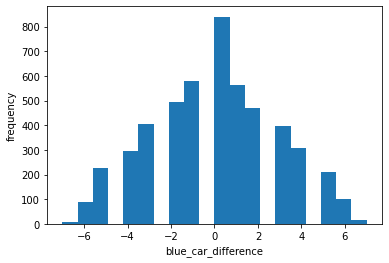

In [481]:
# A histogram showing frequency  of a Blue Car
df['blue_car_difference'].plot.hist(bins=20)
plt.ylabel('frequency')
plt.xlabel("blue_car_difference")
